## **Fast AI Experements Based on [this](https://towardsdatascience.com/transfer-learning-using-the-fastai-library-d686b238213e) blog**

trained models in this [google Drive Folder](https://drive.google.com/open?id=1bW0UjVudEarP5qTToxwDtcIKXX9iuM9L)

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# !unzip drive/My\ Drive/ammi-2020-convnets.zip 
# !mkdir models
# !cp -r drive/My\ Drive/data/models/* models/.


!cp -r models/* drive/My\ Drive/data/models/.


In [0]:
!pip install pretrainedmodels
!pip uninstall torch torchvision -y 
!pip install torch==1.4.0 torchvision==0.5.0 

     |████████████████████████████████| 61kB 2.2MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60962 sha256=25b8c1fd6245b4959f2698547a0d373b6f2dcb2913efd115beb712438dfd5847
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built pretrainedmodels
Uninstalling torch-1.5.0+cu101:
  Successfully uninstalled torch-1.5.0+cu101
Uninstalling torchvision-0.6.0+cu101:
  Successfully uninstalled torchvision-0.6.0+cu101
     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 54kB/s 


# Importing Fast AI library

In [0]:
import os 
import pretrainedmodels

from tqdm import tqdm

In [0]:
from fastai import *
from fastai.vision import *

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc,roc_curve

from math import floor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import os,glob
os.listdir('train/train/')

['healthy', 'cmd', 'cbsd', 'cgm', 'cbb']

In [0]:
healthy=glob.glob('train/train/healthy/*.*')
cmd=glob.glob('train/train/cmd/*.*')
cbsd=glob.glob('train/train/cbsd/*.*')
cgm=glob.glob('train/train/cgm/*.*')
cbb=glob.glob('train/train/cbb/*.*')

In [0]:
img_path=[]
img_path=img_path+healthy+cmd+cbsd+cgm+cbb
df=pd.DataFrame({'img_path':img_path})
df.shape

(5656, 1)

In [0]:
df.head()

,img_path
0,train/train/healthy/train-healthy-103.jpg
1,train/train/healthy/train-healthy-280.jpg
2,train/train/healthy/train-healthy-191.jpg
3,train/train/healthy/train-healthy-161.jpg
4,train/train/healthy/train-healthy-243.jpg


In [0]:
df['disease_class'] = df['img_path'].apply(lambda x: x.split("/")[3].split('.')[0].split('-')[1])
df['ext'] = df['img_path'].apply(lambda x: x.split(".")[-1])


In [0]:
df.tail(15)

,img_path,disease_class,ext
5641,train/train/cbb/train-cbb-189.jpg,cbb,jpg
5642,train/train/cbb/train-cbb-288.jpg,cbb,jpg
5643,train/train/cbb/train-cbb-81.jpg,cbb,jpg
5644,train/train/cbb/train-cbb-110.jpg,cbb,jpg
5645,train/train/cbb/train-cbb-265.jpg,cbb,jpg
5646,train/train/cbb/train-cbb-90.jpg,cbb,jpg
5647,train/train/cbb/train-cbb-264.jpg,cbb,jpg
5648,train/train/cbb/train-cbb-427.jpg,cbb,jpg
5649,train/train/cbb/train-cbb-406.jpg,cbb,jpg
5650,train/train/cbb/train-cbb-282.jpg,cbb,jpg


In [0]:
df.drop('ext',axis=1,inplace=True)
df.head()

,img_path,disease_class
0,train/train/healthy/train-healthy-103.jpg,healthy
1,train/train/healthy/train-healthy-280.jpg,healthy
2,train/train/healthy/train-healthy-191.jpg,healthy
3,train/train/healthy/train-healthy-161.jpg,healthy
4,train/train/healthy/train-healthy-243.jpg,healthy


In [0]:
df.shape

(5656, 2)

In [0]:
df.reset_index(inplace=True)

In [0]:
df.drop('index',axis=1,inplace=True)
df.head()

,img_path,disease_class
0,train/train/healthy/train-healthy-103.jpg,healthy
1,train/train/healthy/train-healthy-280.jpg,healthy
2,train/train/healthy/train-healthy-191.jpg,healthy
3,train/train/healthy/train-healthy-161.jpg,healthy
4,train/train/healthy/train-healthy-243.jpg,healthy


In [0]:
test_img_path=glob.glob('./test/test/0/*.*')
test_df=pd.DataFrame({'test_img_path':test_img_path})
test_df['ext'] = test_df['test_img_path'].apply(lambda x: x.split(".")[-1])
test_df.shape


(3774, 2)

In [0]:
test_df.drop('ext',axis=1,inplace=True)
test_df.reset_index(inplace=True)
test_df.drop('index',axis=1,inplace=True)
test_df.head()

,test_img_path
0,./test/test/0/test-img-2073.jpg
1,./test/test/0/test-img-2118.jpg
2,./test/test/0/test-img-3514.jpg
3,./test/test/0/test-img-1622.jpg
4,./test/test/0/test-img-2584.jpg


In [0]:
df['disease_class'].value_counts()

cmd        2658
cbsd       1443
cgm         773
cbb         466
healthy     316
Name: disease_class, dtype: int64

In [0]:
df.head()

,img_path,disease_class
0,train/train/healthy/train-healthy-103.jpg,healthy
1,train/train/healthy/train-healthy-280.jpg,healthy
2,train/train/healthy/train-healthy-191.jpg,healthy
3,train/train/healthy/train-healthy-161.jpg,healthy
4,train/train/healthy/train-healthy-243.jpg,healthy


In [0]:
def create_databunch(valid_idx):
    transform_kwargs = {"do_flip": True,
                    "flip_vert": True,
                    "max_rotate": 180,
                    "max_zoom": 1.1,
                    "max_lighting": 0.2,
                    "max_warp": 0.2,
                    "p_affine": 0.75,
                    "p_lighting": 0.7}
    test = ImageList.from_df(test_df,path='.')
    data = (ImageList.from_df(df, path='.')
                .split_by_idx(valid_idx)
                .label_from_df(cols='disease_class')
                .add_test(test)
                .transform(get_transforms(**transform_kwargs), size=256)
                .databunch(path='.', bs=32)
                .normalize(imagenet_stats)
                )
    return data

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


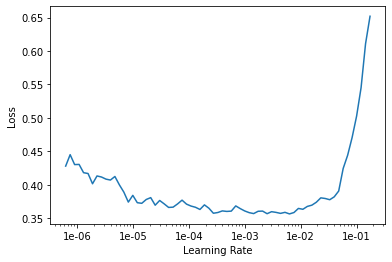

In [0]:
learn = create_cnn(data,models.vgg19_bn, metrics=[error_rate,accuracy])
learn.load('vgg_93.pt')
learn.lr_find()
learn.recorder.plot()

In [0]:
densenet_learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.613593,0.810809,0.285714,0.714286,01:04
1,1.119834,0.690074,0.228430,0.771570,01:02
2,0.936760,0.623307,0.214993,0.785007,01:00
3,0.823700,0.613507,0.214286,0.785714,00:59
4,0.752827,0.564604,0.201556,0.798444,01:00
5,0.738329,0.527979,0.183168,0.816832,01:00
6,0.650689,0.512006,0.180339,0.819661,01:01
7,0.623610,0.482656,0.162659,0.837341,01:01
8,0.551911,0.468240,0.156294,0.843706,01:01
9,0.544783,0.440990,0.154173,0.845827,01:01


KeyboardInterrupt: ignored

In [0]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4,shuffle=True,random_state=123)
acc_val=[]
i = 0
for train_idx, valid_idx in kf.split(df):
      print("Validation set:--->  ",i+1)
      data = create_databunch(valid_idx)
      learn = cnn_learner(data,models.vgg19_bn, metrics=[error_rate,accuracy])
      learn.load('vgg_93.pt')
      learn.fit_one_cycle(1, 1e-3)
      learn.unfreeze()
      learn.fit_one_cycle(9, slice(1e-4,1e-2))
      loss,error_r,acc=learn.validate()
      acc_val.append(acc.numpy())
      i=i+1

print("The validation accuracy is: ",np.mean(acc_val))

Validation set:--->   1


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.400959,0.164064,0.053748,0.946252,01:01


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.567346,0.747997,0.214993,0.785007,01:08
1,0.683578,1.288589,0.382603,0.617397,01:07
2,0.734666,0.676725,0.238331,0.761669,01:06
3,0.597939,0.809347,0.256011,0.743989,01:07
4,0.578304,0.496796,0.154880,0.845120,01:07
5,0.518873,0.530520,0.185997,0.814003,01:07
6,0.462212,0.386396,0.113154,0.886846,01:07
7,0.444511,0.339280,0.102546,0.897454,01:07
8,0.382733,0.332330,0.095474,0.904526,01:07


Validation set:--->   2


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.405517,0.160280,0.053748,0.946252,01:01


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.531107,0.678389,0.186704,0.813296,01:07
1,0.709011,0.642209,0.197313,0.802687,01:07
2,0.727516,0.978259,0.241867,0.758133,01:06
3,0.641618,0.597109,0.211457,0.788543,01:06
4,0.614160,0.527340,0.158416,0.841584,01:06
5,0.536648,0.571115,0.201556,0.798444,01:06
6,0.452567,0.427540,0.128713,0.871287,01:06
7,0.421204,0.397014,0.117397,0.882603,01:06
8,0.389779,0.376128,0.105375,0.894625,01:06


Validation set:--->   3


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.372929,0.180118,0.054455,0.945545,01:00


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.532680,0.742741,0.211457,0.788543,01:06
1,0.699916,0.886323,0.252475,0.747525,01:07
2,0.703156,0.876590,0.241160,0.758840,01:07
3,0.598381,0.616986,0.214993,0.785007,01:06
4,0.565589,0.528715,0.176803,0.823197,01:06
5,0.533203,0.452218,0.135785,0.864215,01:06
6,0.461756,0.443502,0.135078,0.864922,01:06
7,0.409625,0.388212,0.116690,0.883310,01:06
8,0.373796,0.397332,0.115276,0.884724,01:06


Validation set:--->   4


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.370695,0.192803,0.057284,0.942716,01:00


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.548565,0.666173,0.212164,0.787836,01:06
1,0.710321,1.003863,0.241160,0.758840,01:06
2,0.727407,0.600558,0.193069,0.806931,01:06
3,0.604270,0.551001,0.185290,0.814710,01:06
4,0.578134,0.958561,0.236209,0.763791,01:06
5,0.541501,0.441999,0.141443,0.858557,01:06
6,0.450402,0.388123,0.132956,0.867044,01:07
7,0.407774,0.386363,0.124470,0.875530,01:06
8,0.383536,0.371101,0.119519,0.880481,01:06


The validation accuracy is:  0.8910891


In [0]:
learn.save("vgg_cross_89", return_path=True)

PosixPath('models/vgg_cross_89.pth')

In [0]:
#Prediction of the Test Set
preds_test, y_test = learn.get_preds(DatasetType.Test)

In [0]:
submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test/test/0/') ]})
for i, c in enumerate(learn.data.classes):
  submission[c] = preds_test[:,i]
submission = submission[['Category']] # Get same order as sample sub
submission.head()

In [0]:
submission.to_csv('/content/drive/My Drive/ICLR/submission.csv', index = False)